# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
import pandas as pd

ad = pd.read_csv("ad_data.csv")
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   ad_type           10000 non-null  object
 2   ad_medium         10000 non-null  object
 3   ad_response       10000 non-null  bool  
 4   items_purchased   10000 non-null  object
 5   drinks_purchased  10000 non-null  object
dtypes: bool(1), int64(1), object(4)
memory usage: 400.5+ KB


In [2]:
cd = pd.read_csv("customer_data.csv")
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  int64  
 1   state        10000 non-null  object 
 2   sex          10000 non-null  object 
 3   age          10000 non-null  float64
 4   occupation   10000 non-null  object 
 5   family_size  10000 non-null  int64  
 6   income       10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


In [3]:
df = pd.merge(ad, cd, on="customer_id")
df.head()

,customer_id,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased,state,sex,age,occupation,family_size,income
0,3226,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['gatorade', 'mug root beer', 'baja blast', 'd...",CA,M,30.0,Government,5,62303
1,5217,DISCOUNT-50%,15 sec YouTube ad,False,"['crunchy taco', 'cheesy bean and rice burrito']","['gatorade', 'diet pepsi']",OH,M,36.0,Retail,1,39638
2,5247,REWARD - Free Garlic Steak Nacho Fries with pu...,15 sec YouTube ad,True,"['steak garlic nacho fries', 'cheesy gordita c...","['mountain dew', 'starry']",WV,M,31.0,IT,1,112766
3,7793,DISCOUNT-5%,30 sec Hulu commercial,False,"['crunchwrap supreme', 'cravings box', 'crunch...","['baja blast', 'brisk', 'mountain dew']",MI,F,57.0,Government,2,137374
4,5759,DISCOUNT-50%,15 sec YouTube ad,False,"['nachos bellgrande', 'crunchy taco']","['pepsi', 'diet pepsi']",RI,M,22.0,Education,1,41748


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

<Axes: xlabel='age', ylabel='income'>

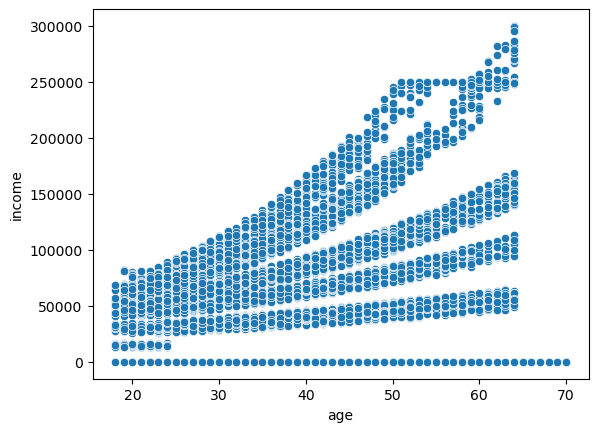

In [4]:
import seaborn as sns

sns.scatterplot(data=df, x='age', y='income')

In [5]:
from sklearn.model_selection import train_test_split
train_df, _ = train_test_split(df, test_size=0.3, random_state=42)
train_df = train_df[["age", "income", "family_size"]]
train_df.head()

,age,income,family_size
9069,39.0,34046,1
2603,23.0,14379,0
7738,20.0,41447,0
1579,22.0,13702,2
5058,50.0,99332,1


In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6)
model.fit(train_df)

KMeans(n_clusters=6)

In [7]:
model.cluster_centers_

array([[3.60157209e+01, 4.05729057e+04, 1.77338957e+00],
       [4.81425577e+01, 1.51877210e+05, 2.19287212e+00],
       [4.18491859e+01, 1.02246742e+05, 2.02056555e+00],
       [4.14258760e+01, 5.01352561e+03, 2.14824798e+00],
       [5.61775148e+01, 2.34373982e+05, 2.29585799e+00],
       [3.49178008e+01, 6.88662014e+04, 1.75884594e+00]])

In [8]:
dfe = pd.get_dummies(df, columns=['ad_type', 'ad_medium', 'state', 'sex', 'occupation'], drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dfs = dfe.copy()
numeric_columns = ['age', 'family_size', 'income']
dfs[numeric_columns] = scaler.fit_transform(dfe[numeric_columns])

dfs.head()

,customer_id,ad_response,items_purchased,drinks_purchased,age,family_size,income,ad_type_BOGO - Garlic Steak Nacho Fries,ad_type_DISCOUNT-10%,ad_type_DISCOUNT-20%,...,sex_M,occupation_Food Service,occupation_Government,occupation_Healthcare,occupation_IT,occupation_Other,occupation_Retail,occupation_Retired,occupation_Student,occupation_Unemployed
0,3226,True,"['steak garlic nacho fries', 'steak garlic nac...","['gatorade', 'mug root beer', 'baja blast', 'd...",-0.734655,2.024075,-0.097474,True,False,False,...,True,False,True,False,False,False,False,False,False,False
1,5217,False,"['crunchy taco', 'cheesy bean and rice burrito']","['gatorade', 'diet pepsi']",-0.215324,-0.584689,-0.588504,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,5247,True,"['steak garlic nacho fries', 'cheesy gordita c...","['mountain dew', 'starry']",-0.648100,-0.584689,0.995793,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,7793,False,"['crunchwrap supreme', 'cravings box', 'crunch...","['baja blast', 'brisk', 'mountain dew']",1.602337,0.067502,1.528918,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5759,False,"['nachos bellgrande', 'crunchy taco']","['pepsi', 'diet pepsi']",-1.427097,-0.584689,-0.542792,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = [""]

X = dfs[features]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

NameError: name 'features' is not defined

#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

In [ ]:
# Test model here.

#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

#### Link your ad here.